In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from screaming_rocks.genData import dataLoader
%matplotlib inline


d = '../seismology_data/'
files = os.listdir(d)
files.sort()
pairs = []
for i, f in enumerate(files[:-1]):
    if f[:-4] == files[i+1][:-4]:
        pairs.append(f[:-4])
print(pairs)

['rct-uop-021115.data.00015', 'rct-uop-021115.data.00016']


In [2]:
pair = dataLoader(d+'rct-uop-021115.data.00015.wve',
                  d+'rct-uop-021115.data.00015.srm',
                  chunk_time=0.001)
print(pair.duration)
data = pair[0]

59.768


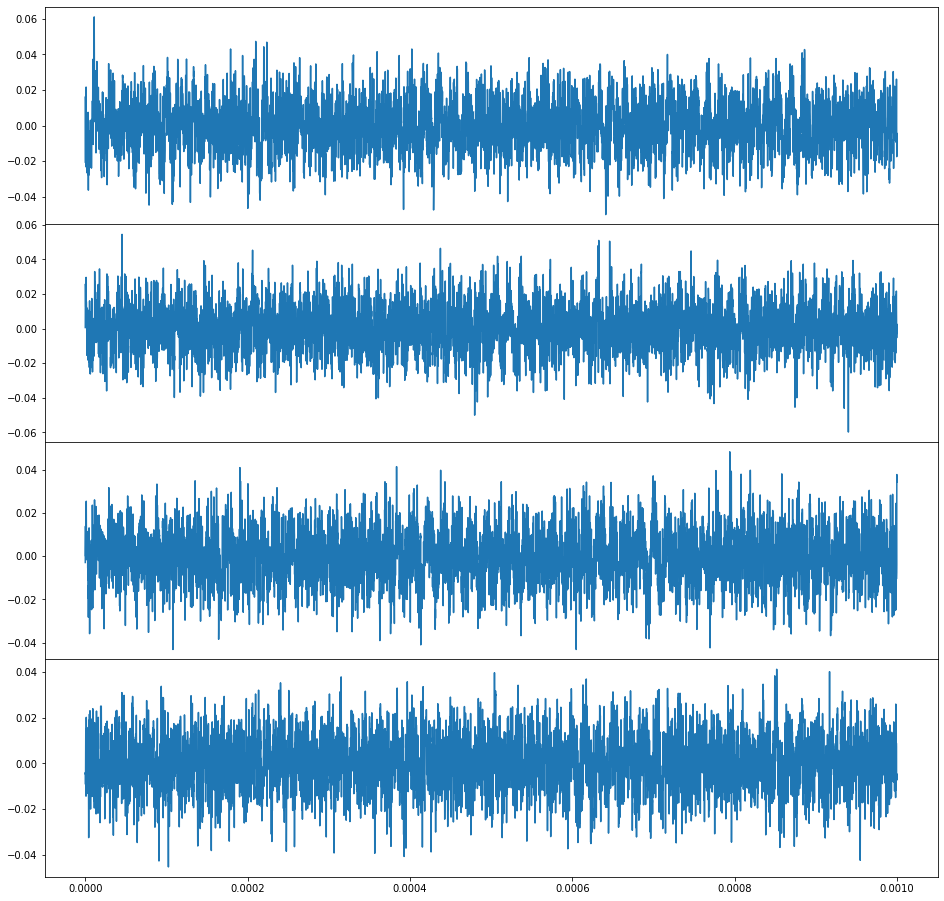

In [3]:
fig, ax = plt.subplots(nrows=pair.nchannels, figsize=(16, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
for i in range(pair.nchannels):
    ax[i].plot(data[i].sample_times, data[i])

/home/mcisaacc/envs/jupyter/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


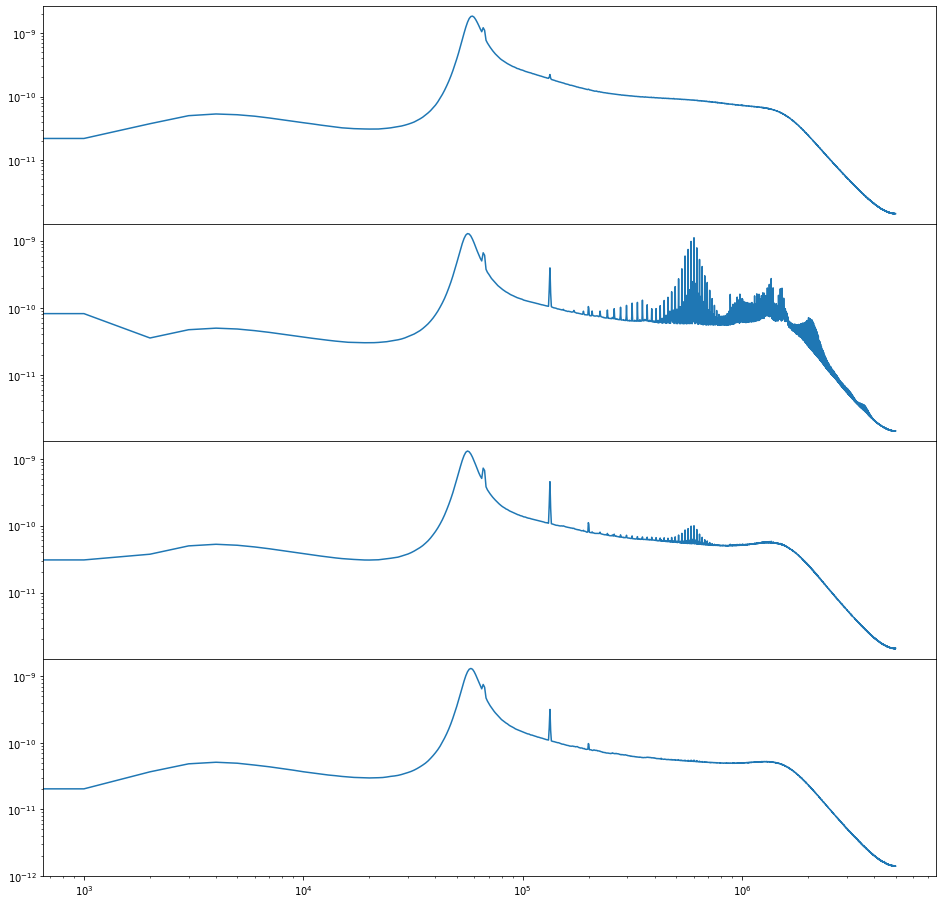

In [4]:
psds = pair.welch()
fig, ax = plt.subplots(nrows=pair.nchannels, figsize=(16, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
for i in range(pair.nchannels):
    ax[i].loglog(psds[i].sample_frequencies, psds[i])

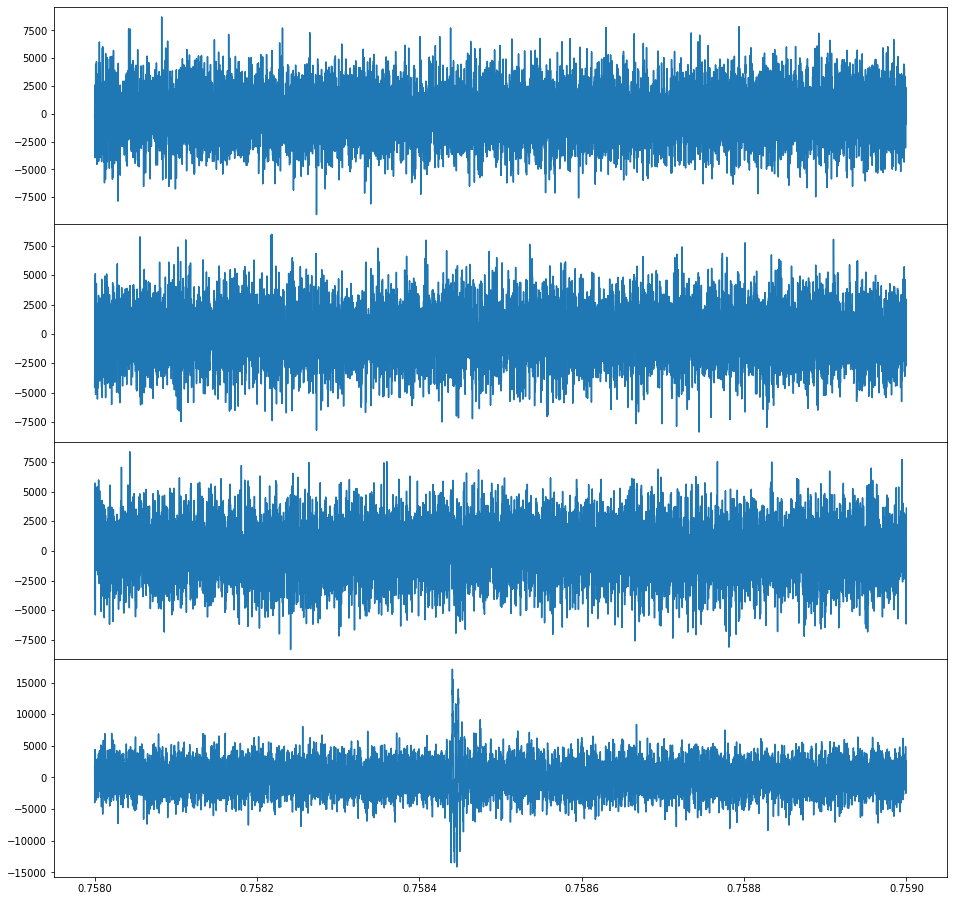

In [5]:
white = pair.whitened(758)
fig, ax = plt.subplots(nrows=pair.nchannels, figsize=(16, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
for i in range(pair.nchannels):
    ax[i].plot(white[i].sample_times, white[i])